<a href="https://colab.research.google.com/github/HfzhImn/computer-vision/blob/main/jobsheet03/Jobsheet_3_Teknik_Regresi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JOBSHEET 03: TEKNIK REGRESI GAMBAR

## Praktikum D1 – Regresi dari Citra Sintetis (Prediksi Radius Lingkaran)

Bayangkan Anda memiliki ribuan gambar hitam-putih sederhana yang masing-masing berisi satu lingkaran dengan ukuran berbeda. Dari gambar-gambar itu, bisakah komputer menebak berapa besar radius lingkarannya hanya dengan melihat citra tersebut?

Di praktikum ini, kita akan membuat dataset sendiri menggunakan Python. Setiap gambar dihasilkan secara acak dengan lingkaran berwarna putih di atas latar hitam. Labelnya? Nilai radius lingkaran itu sendiri! Inilah pintu masuk untuk memahami konsep dasar regresi gambar: kita akan melatih model Convolutional Neural Network (CNN) kecil agar mampu memetakan gambar → angka.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models

# Generator 1 sample
def make_sample(img_size=64, min_r=5, max_r=20):
    r = np.random.randint(min_r, max_r + 1)  # radius acak
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)  # center-x
    cy = np.random.randint(r, img_size - r)  # center-y
    cv2.circle(img, (cx, cy), r, (255,), -1)  # lingkaran putih terisi
    img = (img / 255.0).astype(np.float32)
    # 3-channel biar kompatibel CNN
    img3 = np.stack([img, img, img], axis=-1)
    return img3, float(r), (cx, cy)

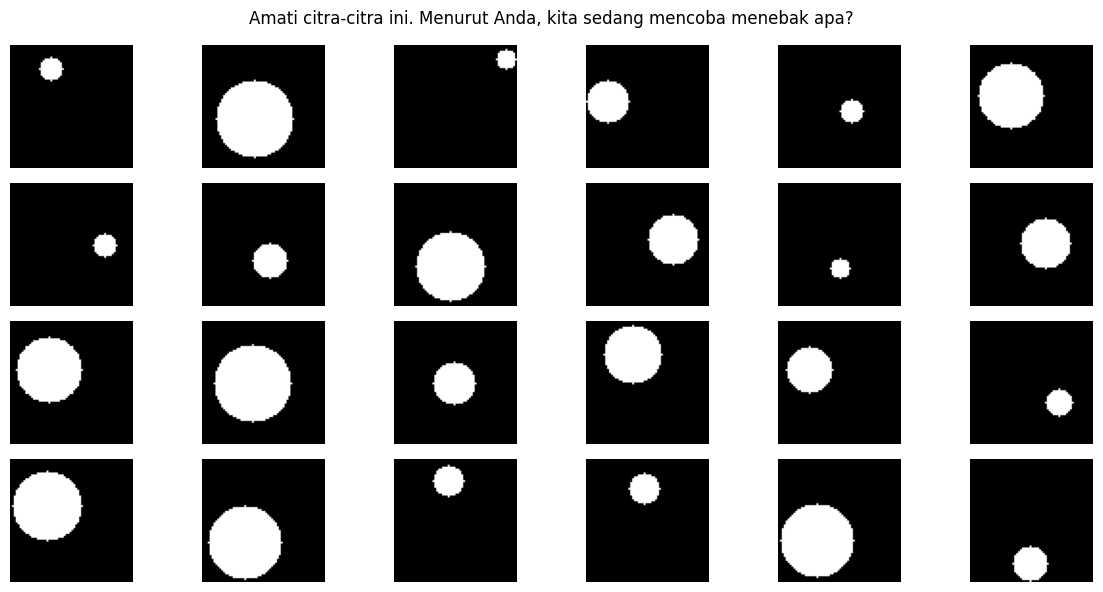

In [2]:
# Buat 24 contoh untuk visualisasi
N_show = 24
samples = [make_sample() for _ in range(N_show)]
imgs = [s[0] for s in samples]
rads = [s[1] for s in samples]
centers = [s[2] for s in samples]

# Grid gambar tanpa label:
cols = 6
rows = N_show // cols
plt.figure(figsize=(12, 6))
for i in range(N_show):
    plt.subplot(rows, cols, i+1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.suptitle("Amati citra-citra ini. Menurut Anda, kita sedang mencoba menebak apa?")
plt.tight_layout()
plt.show()

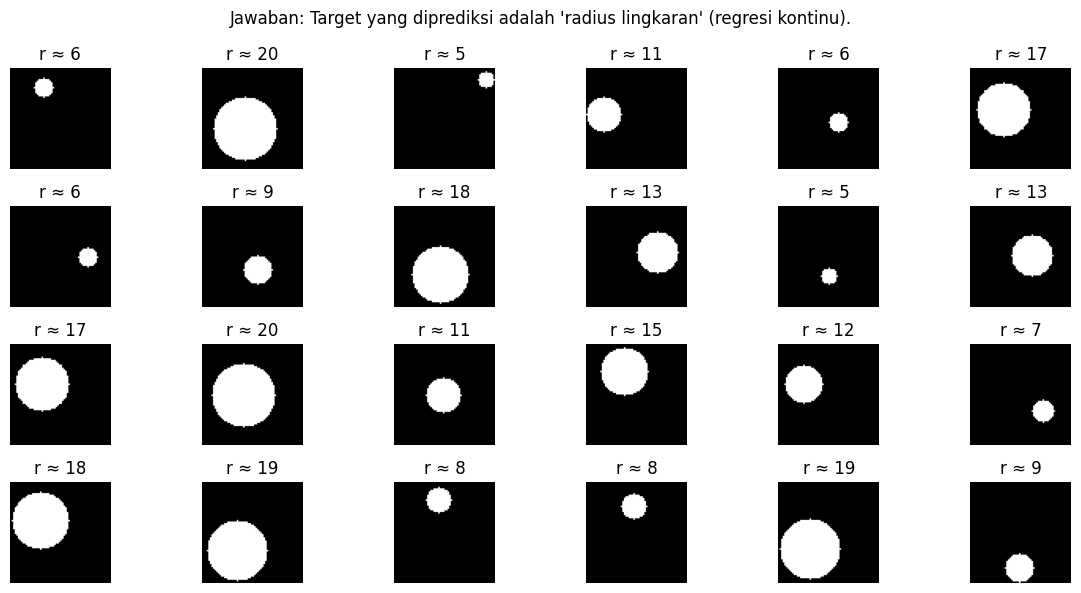

In [4]:
# Tampilkan kembali, sekarang tampilkan radius (label) di judul tiap subplot
plt.figure(figsize=(12, 6))
for i in range(N_show):
    plt.subplot(rows, cols, i+1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    plt.title(f"r ≈ {int(rads[i])}")
    plt.axis('off')

plt.suptitle("Jawaban: Target yang diprediksi adalah 'radius lingkaran' (regresi kontinu).")
plt.tight_layout()
plt.show()

In [5]:
# Siapkan dataset lebih besar untuk training
N = 3000
X, y, C = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Model CNN sederhana
model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # output regresi
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(Xtr, ytr, validation_data=(Xte, yte),
                  epochs=12, batch_size=64, verbose=0)

# Evaluasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred)**2)))
r2 = r2_score(yte, y_pred)
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
MAE=0.915 | RMSE=1.166 | R²=0.930


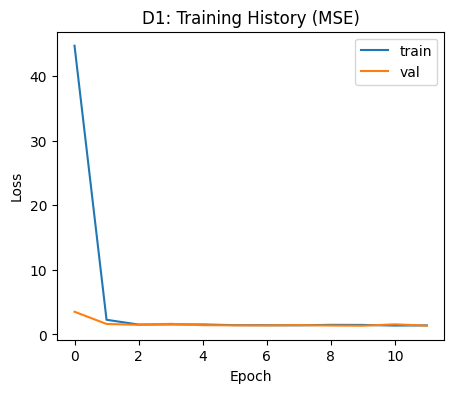

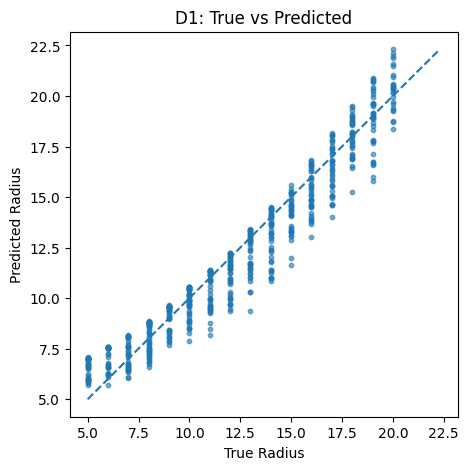

In [6]:
# Plot loss
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("D1: Training History (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

# Scatter True vs Pred
plt.figure(figsize=(5,5))
plt.scatter(yte, y_pred, s=10, alpha=0.6)
lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius"); plt.ylabel("Predicted Radius")
plt.title("D1: True vs Predicted")
plt.show()

### Tantangan Mini (Opsional untuk Mahasiswa)

* Ubah rentang radius (mis. 8–28) dan lihat dampaknya ke MAE/RMSE/R².
* Tambahkan noise (blur, noise Gaussian) ke citra → bagaimana performanya?
* Jadikan tugas multi-output: prediksikan [r,cx,cy][r, c_x, c_y][r,cx,cy] sekaligus; metrik evaluasi apa yang cocok?





🚀 MEMULAI SKENARIO 1: RENTANG RADIUS DIUBAH (8-28)
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

--- ✅ Hasil Skenario 1 (Radius 8-28) ---
MAE=0.776 | RMSE=0.982 | R²=0.974


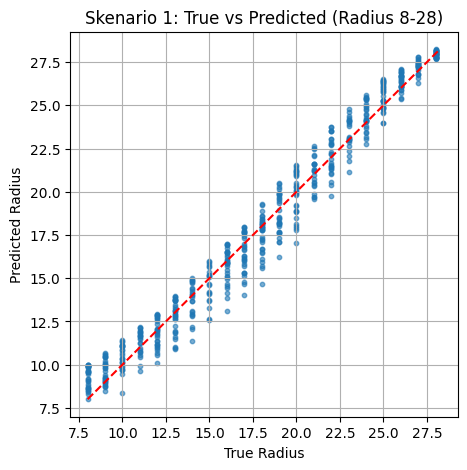


🚀 MEMULAI SKENARIO 2: CITRA DENGAN NOISE
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step

--- ✅ Hasil Skenario 2 (Dengan Noise) ---
MAE=0.613 | RMSE=0.790 | R²=0.971


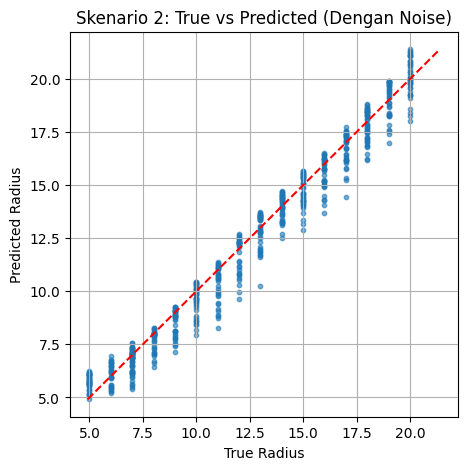


🚀 MEMULAI SKENARIO 3: MULTI-OUTPUT (r, cx, cy)
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

--- ✅ Hasil Skenario 3 (Multi-Output) ---
MAE Total  = 3.170
R² Total   = 0.815
--------------------
MAE Radius   = 1.003
MAE Center-X = 4.739
MAE Center-Y = 3.769


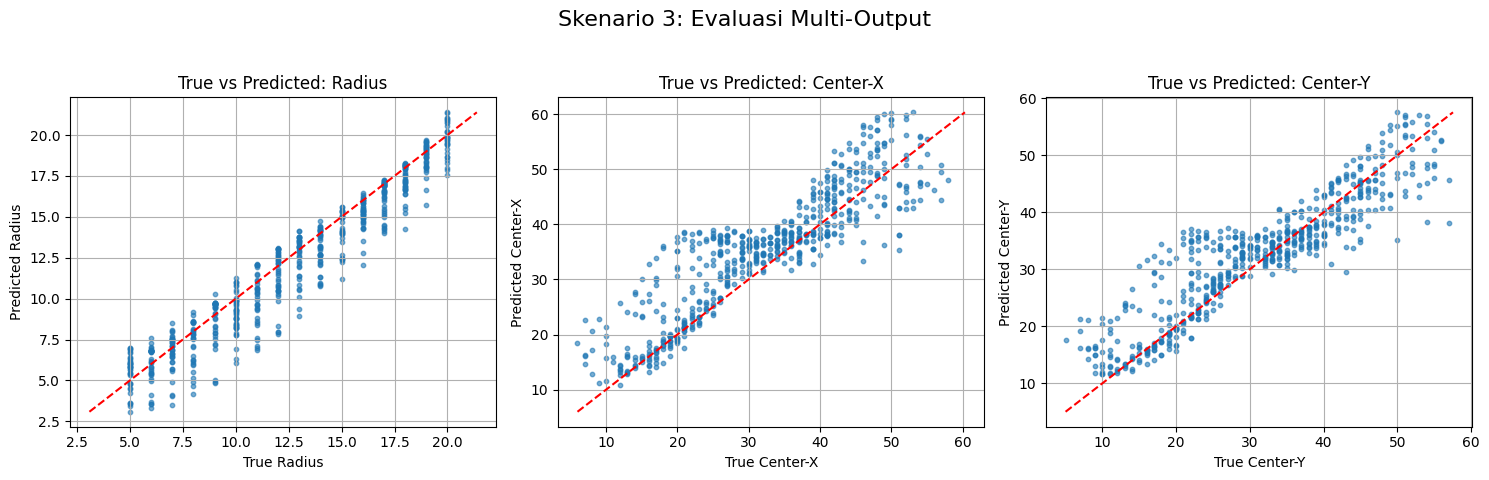

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models
import os

# Menonaktifkan beberapa pesan log TensorFlow untuk output yang lebih bersih
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# ==============================================================================
# FUNGSI-FUNGSI PEMBUAT DATASET UNTUK SETIAP SKENARIO
# ==============================================================================

def make_sample_variasi_radius(img_size=64, min_r=8, max_r=28):
    """Skenario 1: Menghasilkan gambar dengan rentang radius yang lebih lebar."""
    r = np.random.randint(min_r, max_r + 1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, (255,), -1)
    img = (img / 255.0).astype(np.float32)
    img3 = np.stack([img, img, img], axis=-1)
    return img3, float(r)

def make_sample_with_noise(img_size=64, min_r=5, max_r=20):
    """Skenario 2: Menghasilkan gambar dengan tambahan blur dan noise."""
    r = np.random.randint(min_r, max_r + 1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, (255,), -1)

    # Menambahkan Gaussian Blur
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # Menambahkan Gaussian Noise
    noise = np.random.normal(0, 15, img.shape).astype(np.uint8)
    img = cv2.add(img, noise)

    img = (img / 255.0).astype(np.float32)
    img3 = np.stack([img, img, img], axis=-1)
    return img3, float(r)

def make_sample_multi_output(img_size=64, min_r=5, max_r=20):
    """Skenario 3: Menghasilkan gambar dan label multi-output [r, cx, cy]."""
    r = np.random.randint(min_r, max_r + 1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, (255,), -1)
    img = (img / 255.0).astype(np.float32)
    img3 = np.stack([img, img, img], axis=-1)
    label = np.array([float(r), float(cx), float(cy)], dtype=np.float32)
    return img3, label

# ==============================================================================
# FUNGSI-FUNGSI UNTUK MENJALANKAN SETIAP SKENARIO
# ==============================================================================

def jalankan_skenario_1():
    """Melatih dan mengevaluasi model untuk prediksi radius dengan rentang 8-28."""
    print("\n" + "="*50)
    print("🚀 MEMULAI SKENARIO 1: RENTANG RADIUS DIUBAH (8-28)")
    print("="*50)

    N = 3000
    X, y = zip(*[make_sample_variasi_radius() for _ in range(N)])
    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.float32)

    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

    model = models.Sequential([
        layers.Input((64,64,3)),
        layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation='relu'), layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=12, batch_size=64, verbose=0)

    y_pred = model.predict(Xte).ravel()
    mae = mean_absolute_error(yte, y_pred)
    rmse = np.sqrt(mean_squared_error(yte, y_pred))
    r2 = r2_score(yte, y_pred)

    print("\n--- ✅ Hasil Skenario 1 (Radius 8-28) ---")
    print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")

    plt.figure(figsize=(5,5))
    plt.scatter(yte, y_pred, s=10, alpha=0.6)
    lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
    plt.plot(lims, lims, '--', color='red')
    plt.xlabel("True Radius"); plt.ylabel("Predicted Radius")
    plt.title("Skenario 1: True vs Predicted (Radius 8-28)")
    plt.grid(True)
    plt.show()

def jalankan_skenario_2():
    """Melatih dan mengevaluasi model untuk gambar dengan noise."""
    print("\n" + "="*50)
    print("🚀 MEMULAI SKENARIO 2: CITRA DENGAN NOISE")
    print("="*50)

    N = 3000
    X, y = zip(*[make_sample_with_noise() for _ in range(N)])
    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.float32)

    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

    model = models.Sequential([
        layers.Input((64,64,3)),
        layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation='relu'), layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=12, batch_size=64, verbose=0)

    y_pred = model.predict(Xte).ravel()
    mae = mean_absolute_error(yte, y_pred)
    rmse = np.sqrt(mean_squared_error(yte, y_pred))
    r2 = r2_score(yte, y_pred)

    print("\n--- ✅ Hasil Skenario 2 (Dengan Noise) ---")
    print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")

    plt.figure(figsize=(5,5))
    plt.scatter(yte, y_pred, s=10, alpha=0.6)
    lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
    plt.plot(lims, lims, '--', color='red')
    plt.xlabel("True Radius"); plt.ylabel("Predicted Radius")
    plt.title("Skenario 2: True vs Predicted (Dengan Noise)")
    plt.grid(True)
    plt.show()

def jalankan_skenario_3():
    """Melatih dan mengevaluasi model untuk prediksi multi-output [r, cx, cy]."""
    print("\n" + "="*50)
    print("🚀 MEMULAI SKENARIO 3: MULTI-OUTPUT (r, cx, cy)")
    print("="*50)

    N = 3000
    X, y = zip(*[make_sample_multi_output() for _ in range(N)])
    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.float32)

    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

    model = models.Sequential([
        layers.Input((64,64,3)),
        layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation='relu'), layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dense(3) # Output 3 neuron
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=15, batch_size=64, verbose=0)

    y_pred = model.predict(Xte)

    # Evaluasi Total dan Per-Output
    print("\n--- ✅ Hasil Skenario 3 (Multi-Output) ---")
    print(f"MAE Total  = {mean_absolute_error(yte, y_pred):.3f}")
    print(f"R² Total   = {r2_score(yte, y_pred):.3f}")
    print("-" * 20)
    print(f"MAE Radius   = {mean_absolute_error(yte[:, 0], y_pred[:, 0]):.3f}")
    print(f"MAE Center-X = {mean_absolute_error(yte[:, 1], y_pred[:, 1]):.3f}")
    print(f"MAE Center-Y = {mean_absolute_error(yte[:, 2], y_pred[:, 2]):.3f}")

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    outputs = ['Radius', 'Center-X', 'Center-Y']
    for i, ax in enumerate(axes):
        ax.scatter(yte[:, i], y_pred[:, i], s=10, alpha=0.6)
        lims = [min(yte[:, i].min(), y_pred[:, i].min()), max(yte[:, i].max(), y_pred[:, i].max())]
        ax.plot(lims, lims, '--', color='red')
        ax.set_xlabel(f"True {outputs[i]}")
        ax.set_ylabel(f"Predicted {outputs[i]}")
        ax.set_title(f"True vs Predicted: {outputs[i]}")
        ax.grid(True)
    fig.suptitle("Skenario 3: Evaluasi Multi-Output", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# ==============================================================================
# PEMANGGILAN FUNGSI UTAMA
# ==============================================================================
if __name__ == '__main__':
    # Hapus tanda komentar '#' pada skenario yang ingin Anda jalankan.
    # Anda bisa menjalankan satu per satu atau semuanya sekaligus.

    jalankan_skenario_1()
    jalankan_skenario_2()
    jalankan_skenario_3()

## Praktikum D2 – Menebak Umur Manusia dari Foto Wajah (UTKFace)

Pernahkah Anda memperhatikan wajah seseorang dan mencoba menebak usianya? Mungkin dari garis senyum, bentuk rahang, atau tekstur kulit. Nah, komputer juga bisa melakukan hal yang sama — dengan belajar dari ribuan contoh wajah berlabel umur. Di praktikum ini, kita akan membuat sistem sederhana yang mampu memperkirakan umur seseorang dari fotonya menggunakan teknik regresi gambar.

In [8]:
# Jalankan ini di awal notebook
from google.colab import files
files.upload()  # pilih file kaggle.json dari komputer Anda


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"hafizhiman","key":"f5f4dc170540352f6c0ae7da18223d5c"}'}

In [9]:
import os, shutil

if os.path.exists("kaggle.json"):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

    !pip -q install kaggle
    print("✅ Kaggle API siap digunakan.")
else:
    print(" 👎 kaggle.json belum ditemukan. Upload terlebih dahulu.")

✅ Kaggle API siap digunakan.


In [10]:
# Unduh dataset UTKFace (sekali saja)
!kaggle datasets download -d jangedoo/utkface-new -p /content -q
!unzip -q /content/utkface-new.zip -d /content/utk
print("✅ Dataset UTKFace berhasil diekstrak.")

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
✅ Dataset UTKFace berhasil diekstrak.


Total gambar ditemukan: 23708


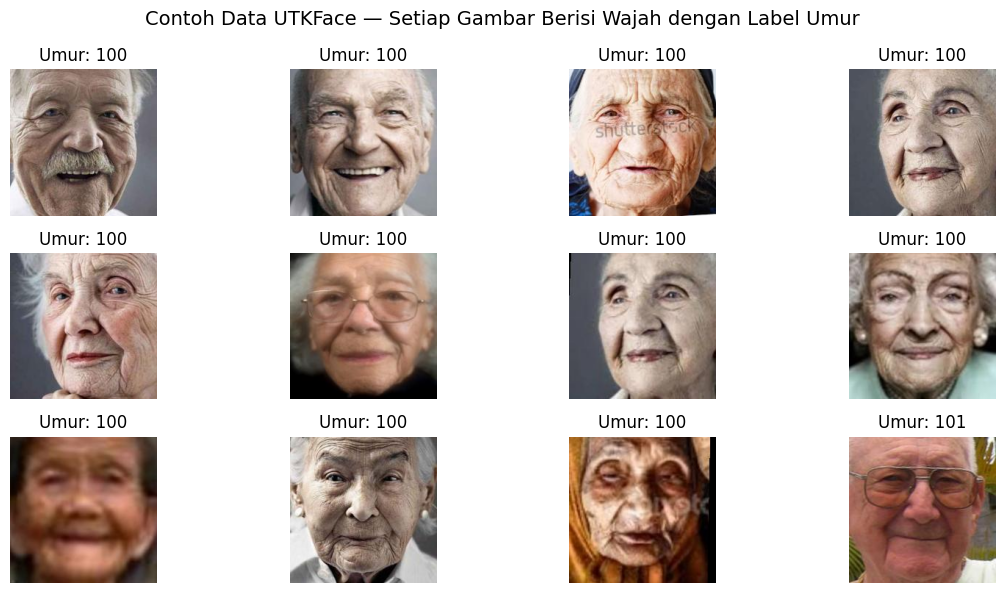

In [11]:
import matplotlib.pyplot as plt
import os, glob
from PIL import Image

# Ambil 12 gambar acak dari dataset
files = glob.glob("/content/utk/UTKFace/*.jpg")
files = sorted(files)
print(f"Total gambar ditemukan: {len(files)}")

plt.figure(figsize=(12, 6))
for i, f in enumerate(files[:12]):
    # Ambil umur dari nama file
    age = int(os.path.basename(f).split("_")[0])
    img = Image.open(f)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Umur: {age}")
    plt.axis("off")

plt.suptitle("Contoh Data UTKFace — Setiap Gambar Berisi Wajah dengan Label Umur", fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

def parse_age_from_name(fp):
    return int(os.path.basename(fp).split('_')[0])

ages = np.array([parse_age_from_name(f) for f in files], dtype=np.float32)
train_files, test_files, y_train, y_test = train_test_split(
    files, ages, test_size=0.2, random_state=42
)

IMG_SIZE = 160
def load_img(fp, label):
    img = tf.io.read_file(fp)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    return img / 255.0, label

train_ds = tf.data.Dataset.from_tensor_slices((train_files, y_train)).map(load_img).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_files, y_test)).map(load_img).batch(64)

print("✅ Dataset siap dilatih.")

✅ Dataset siap dilatih.


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Gunakan GPU jika tersedia
print("Hardware:", "GPU" if tf.config.list_physical_devices('GPU') else "CPU")

# Buat arsitektur model
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base_model.trainable = False  # tahap awal: freeze backbone

# Tambahkan head regresi
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x)  # output tunggal: umur
model = tf.keras.Model(inputs, outputs)

# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='mse', metrics=['mae'])

model.summary()

Hardware: GPU
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply (Multiply)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 63s 146ms/step - loss: 353.9176 - mae: 13.8404 - val_loss: 161.4444 - val_mae: 9.6790 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss: 156.8846 - mae: 9.3213 - val_loss: 150.3144 - val_mae: 9.2592 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 146.6067 - mae: 8.9614 - val_loss: 141.4881 - val_mae: 8.8497 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 140.4924 - mae: 8.7043 - val_loss: 142.5358 - val_mae: 8.9203 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 137.3644 - mae: 8.6060 - val_loss: 141.0897 - val_mae: 8.8740 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 137.8586 - mae: 8.5957 - val_loss: 138.9881 - val_mae: 8.7691 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 133.2607 - mae: 8.4681 - val_loss: 138.1164 - va

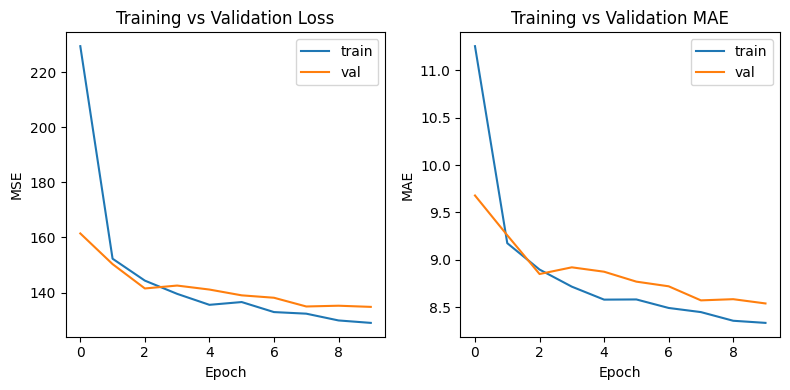

In [14]:
# Callback untuk pelatihan yang lebih stabil
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss'),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, min_lr=1e-5, monitor='val_loss')
]

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    callbacks=cb,
    verbose=1
)

# Visualisasi perubahan loss dan MAE selama pelatihan:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.title('Training vs Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MAE'); plt.title('Training vs Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - loss: 196.3004 - mae: 10.2610 - val_loss: 157.4896 - val_mae: 9.2077 - learning_rate: 1.0000e-04
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 79.7663 - mae: 6.5934 - val_loss: 128.8557 - val_mae: 8.4539 - learning_rate: 1.0000e-04
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 52.8089 - mae: 5.4305 - val_loss: 113.6711 - val_mae: 7.7948 - learning_rate: 1.0000e-04
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - loss: 39.1276 - mae: 4.6915 - val_loss: 122.9737 - val_mae: 8.1483 - learning_rate: 1.0000e-04
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 30.9517 - mae: 4.1685 - val_loss: 110.8638 - val_mae: 7.6600 - learning_rate: 1.0000e-04


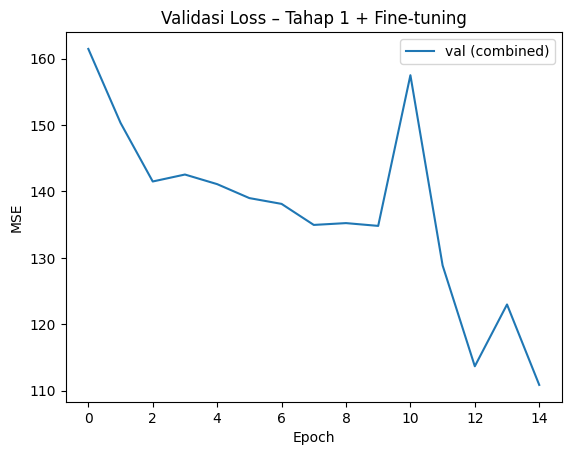

In [15]:
# Aktifkan kembali sebagian layer terakhir untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False  # beku sebagian besar layer

# Recompile dengan learning rate lebih kecil
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='mse', metrics=['mae'])

history_ft = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5,
    callbacks=cb,
    verbose=1
)

# Visualisasi gabungan training dan fine-tuning:
plt.plot(history.history['val_loss'] + history_ft.history['val_loss'], label='val (combined)')
plt.title("Validasi Loss – Tahap 1 + Fine-tuning")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.legend(); plt.show()

MAE  = 7.66 tahun
RMSE = 10.53 tahun
R²   = 0.721


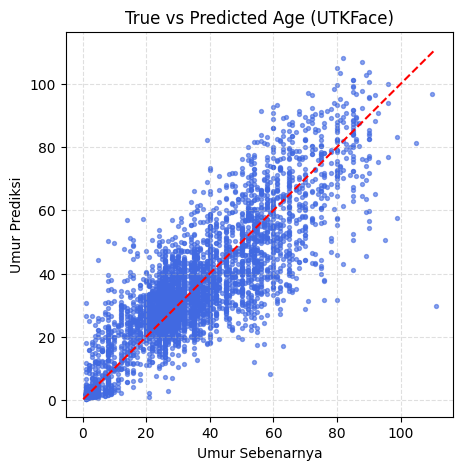

In [16]:
from math import sqrt

y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in test_ds])
mae  = mean_absolute_error(y_test, y_pred)
rmse = sqrt(np.mean((y_test - y_pred)**2))
r2   = r2_score(y_test, y_pred)

print(f"MAE  = {mae:.2f} tahun")
print(f"RMSE = {rmse:.2f} tahun")
print(f"R²   = {r2:.3f}")

# Plot “umur sebenarnya vs umur prediksi”:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=8, alpha=0.6, color='royalblue')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("Umur Sebenarnya")
plt.ylabel("Umur Prediksi")
plt.title("True vs Predicted Age (UTKFace)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

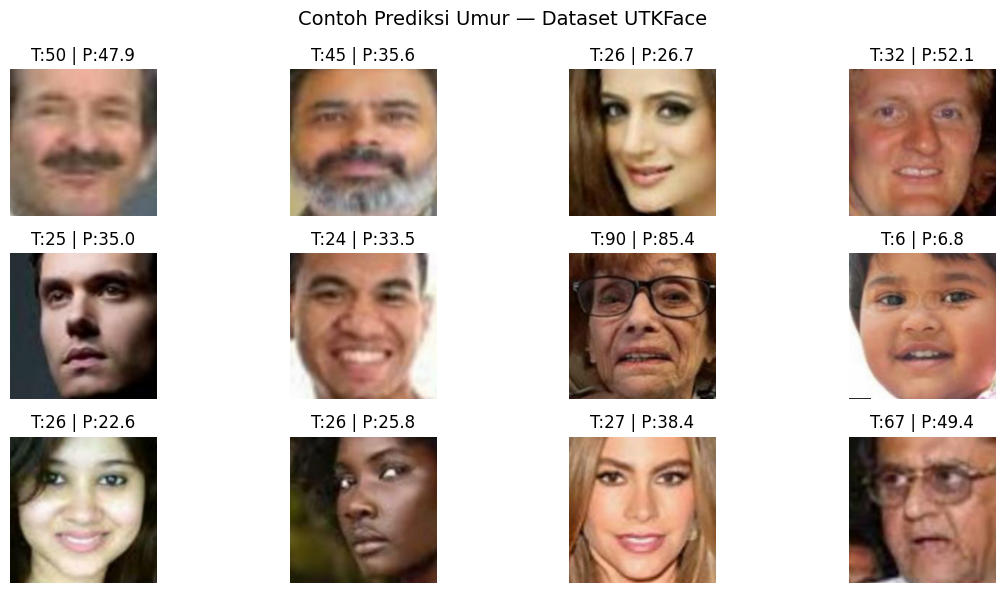

In [17]:
import random

sample_paths = random.sample(test_files, 12)

plt.figure(figsize=(12,6))
for i, path in enumerate(sample_paths):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))/255.0

    true_age = int(os.path.basename(path).split('_')[0])
    pred_age = model.predict(tf.expand_dims(img, 0), verbose=0).ravel()[0]

    plt.subplot(3,4,i+1)
    plt.imshow(img.numpy())
    plt.title(f"T:{true_age} | P:{pred_age:.1f}")
    plt.axis('off')

plt.suptitle("Contoh Prediksi Umur — Dataset UTKFace", fontsize=14)
plt.tight_layout()
plt.show()

### Tantangan Mini (Opsional)
* Tambahkan data augmentation ekstra (kontras, brightness, zoom).
→ Bagaimana pengaruhnya pada MAE?
* Ubah learning rate schedule atau optimizer.
→ Apakah model lebih stabil?
* Pisahkan dataset per kelompok umur (0–10, 11–20, dst).
→ Mana kelompok dengan error terbesar?
* Uji model Anda pada wajah sendiri (setelah resize).
→ Apakah prediksinya realistis?


✅ Kaggle API siap digunakan.
✅ Dataset UTKFace sudah tersedia.

✅ Dataset siap dilatih dengan augmentasi (flip, brightness, contrast, zoom).
Total data latih: 18966, Total data uji: 4742

Model dikompilasi menggunakan AdamW dan CosineDecay LR Schedule.


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply_6 (Multiply)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_6 (TrueDivide)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_6 (Subtract)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


--- Memulai Pelatihan Tahap 1: Feature Extraction ---
Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 47s 128ms/step - loss: 356.6892 - mae: 14.1208 - val_loss: 162.1985 - val_mae: 9.5948
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - loss: 167.9446 - mae: 9.8154 - val_loss: 151.6859 - val_mae: 9.1966
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - loss: 159.7455 - mae: 9.4438 - val_loss: 147.8170 - val_mae: 8.9919
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - loss: 152.5876 - mae: 9.1316 - val_loss: 145.6495 - val_mae: 8.8743
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 149.2141 - mae: 9.0430 - val_loss: 145.2747 - val_mae: 8.8839
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - loss: 146.9106 - mae: 8.9518 - val_loss: 146.3966 - val_mae: 8.8130
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - loss: 146.4980 - mae: 8.8940 - val_loss: 143.7602 - val_mae: 8.7809
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - loss: 144.1157 - ma

/tmp/ipython-input-299100619.py:202: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mae = results_df.groupby('age_group').apply(
/tmp/ipython-input-299100619.py:202: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_mae = results_df.groupby('age_group').apply(


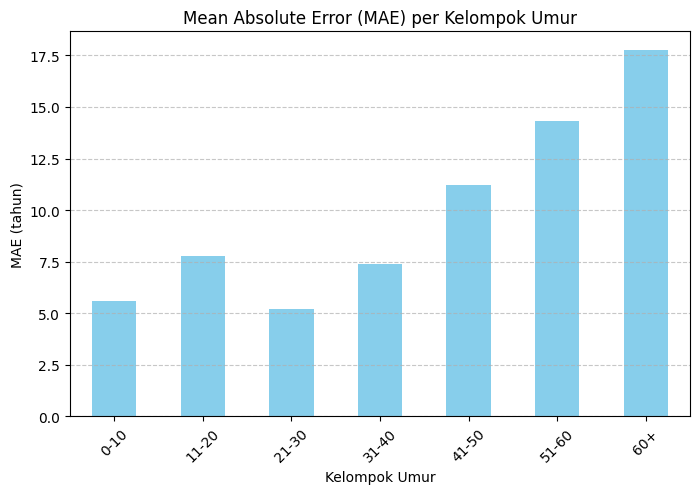


--- Uji Coba pada Wajah Sendiri ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


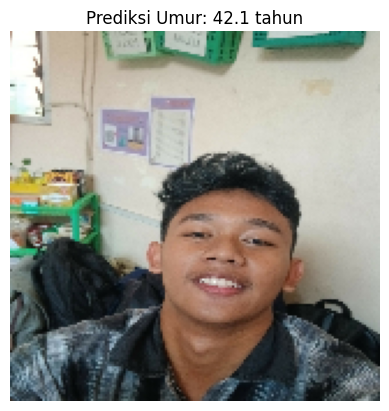

Hasil prediksi untuk gambar 'wajah_saya.jpg' adalah 42.1 tahun.


In [23]:
# ==============================================================================
# 🚀 BAGIAN 1: SETUP DAN UNDUH DATASET
# Hanya perlu dijalankan sekali.
# ==============================================================================
import os
import shutil
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# Import AdamW directly from tf.keras.optimizers
from tensorflow.keras.optimizers import AdamW

# 1.1 Konfigurasi Kaggle API (jika belum ada)
if not os.path.exists("kaggle.json"):
    print(" Gagal: file 'kaggle.json' tidak ditemukan.")
    print("Silakan upload file API key Kaggle Anda terlebih dahulu.")
else:
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
    print("✅ Kaggle API siap digunakan.")

    # 1.2 Unduh dan ekstrak dataset UTKFace
    if not os.path.exists("/content/utk"):
        print("Mengunduh dataset UTKFace...")
        os.system('kaggle datasets download -d jangedoo/utkface-new -p /content -q')
        os.system('unzip -q /content/utkface-new.zip -d /content/utk')
        print("✅ Dataset UTKFace berhasil diekstrak.")
    else:
        print("✅ Dataset UTKFace sudah tersedia.")

# ==============================================================================
# 🖼️ BAGIAN 2: PERSIAPAN DATASET DENGAN AUGMENTASI EKSTRA
# MODIFIKASI 1: Menambahkan kontras, brightness, dan zoom.
# ==============================================================================
# Global constants
IMG_SIZE = 160
BATCH_SIZE = 64
files = glob.glob("/content/utk/UTKFace/*.jpg")
files = sorted(files)

def parse_age_from_name(fp):
    """Mengekstrak umur dari nama file."""
    try:
        return int(os.path.basename(fp).split('_')[0])
    except (IndexError, ValueError):
        return None # Mengembalikan None jika nama file tidak valid

# Memfilter file dengan format nama yang valid
valid_files = [f for f in files if parse_age_from_name(f) is not None]
ages = np.array([parse_age_from_name(f) for f in valid_files], dtype=np.float32)

train_files, test_files, y_train, y_test = train_test_split(
    valid_files, ages, test_size=0.2, random_state=42
)

def augment_data(image, label):
    """Fungsi untuk augmentasi data training."""
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    # Random zoom
    image = tf.image.resize_with_pad(
        tf.image.central_crop(image, np.random.uniform(0.7, 1.0)),
        IMG_SIZE, IMG_SIZE
    )
    return image, label

def load_and_preprocess_image(fp, label, is_training=False):
    """Memuat, memproses, dan mengaugmentasi gambar."""
    img = tf.io.read_file(fp)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))

    if is_training:
        img, label = augment_data(img, label)

    return img / 255.0, label

# Membuat tf.data.Dataset
train_ds = (
    tf.data.Dataset.from_tensor_slices((train_files, y_train))
    .shuffle(1000)
    .map(lambda fp, label: load_and_preprocess_image(fp, label, is_training=True), num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

test_ds = (
    tf.data.Dataset.from_tensor_slices((test_files, y_test))
    .map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

print(f"\n✅ Dataset siap dilatih dengan augmentasi (flip, brightness, contrast, zoom).")
print(f"Total data latih: {len(train_files)}, Total data uji: {len(test_files)}")

# ==============================================================================
# 🧠 BAGIAN 3: MEMBANGUN DAN MELATIH MODEL
# MODIFIKASI 2: Menggunakan optimizer AdamW dan CosineDecay learning rate schedule.
# ==============================================================================

def build_model():
    """Membangun arsitektur model dengan MobileNetV2 sebagai backbone."""
    base_model = tf.keras.applications.MobileNetV2(
        include_top=False,
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
        weights='imagenet'
    )
    base_model.trainable = False

    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(1)(x)
    model = tf.keras.Model(inputs, outputs)
    return model

model = build_model()

# Konfigurasi Learning Rate Schedule (CosineDecay)
total_steps = len(train_files) // BATCH_SIZE * 10 # 10 epoch
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=total_steps,
    alpha=0.0
)

# Menggunakan optimizer AdamW (Adam with Weight Decay)
# Corrected import and usage of AdamW
optimizer = AdamW(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
print("\nModel dikompilasi menggunakan AdamW dan CosineDecay LR Schedule.")
model.summary()

# Latih model (Tahap 1: Feature Extraction)
print("\n--- Memulai Pelatihan Tahap 1: Feature Extraction ---")
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    verbose=1
)

# Latih model (Tahap 2: Fine-Tuning)
print("\n--- Memulai Pelatihan Tahap 2: Fine-Tuning ---")
# Access the MobileNetV2 layer by its name
base_model = model.get_layer("mobilenetv2_1.00_160") # Use the name from model.summary()

if base_model:
    base_model.trainable = True
    # Unfreeze the last 40 layers for fine-tuning
    for layer in base_model.layers[:-40]:
        layer.trainable = False

    # Recompile with learning rate yang sangat kecil untuk fine-tuning
    # Corrected import and usage of AdamW
    ft_optimizer = AdamW(learning_rate=1e-5)
    model.compile(optimizer=ft_optimizer, loss='mse', metrics=['mae'])

    history_ft = model.fit(
        train_ds,
        validation_data=test_ds,
        epochs=5,
        verbose=1
    )
else:
    print("Error: Could not find the MobileNetV2 base model in the model layers.")


# ==============================================================================
# 📊 BAGIAN 4: EVALUASI MODEL SECARA KESELURUHAN & PER KELOMPOK
# MODIFIKASI 3: Memisahkan evaluasi per kelompok umur.
# ==============================================================================
print("\n--- Evaluasi Model Final ---")
y_pred = model.predict(test_ds).ravel()

# 4.1 Evaluasi Keseluruhan
overall_mae = mean_absolute_error(y_test, y_pred)
print(f"**MAE Keseluruhan**: {overall_mae:.2f} tahun")
print(f"**RMSE Keseluruhan**: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} tahun")
print(f"**R² Keseluruhan**: {r2_score(y_test, y_pred):.3f}")

# 4.2 Evaluasi per Kelompok Umur
results_df = pd.DataFrame({'true_age': y_test, 'pred_age': y_pred})
bins = [0, 10, 20, 30, 40, 50, 60, 120]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']
results_df['age_group'] = pd.cut(results_df['true_age'], bins=bins, labels=labels, right=True)

group_mae = results_df.groupby('age_group').apply(
    lambda x: mean_absolute_error(x['true_age'], x['pred_age'])
)

print("\n**MAE per Kelompok Umur:**")
print(group_mae)

# Visualisasi error per kelompok
group_mae.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Mean Absolute Error (MAE) per Kelompok Umur')
plt.ylabel('MAE (tahun)')
plt.xlabel('Kelompok Umur')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ==============================================================================
# 📸 BAGIAN 5: UJI COBA PADA GAMBAR ANDA SENDIRI
# MODIFIKASI 4: Fungsi untuk prediksi pada gambar custom.
# ==============================================================================
def predict_your_age(image_path, trained_model):
    """Memprediksi umur dari satu file gambar."""
    try:
        img = tf.io.read_file(image_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img_resized = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0

        # Tambahkan dimensi batch
        img_batch = tf.expand_dims(img_resized, 0)

        prediction = trained_model.predict(img_batch)[0][0]

        plt.imshow(img_resized.numpy())
        plt.title(f"Prediksi Umur: {prediction:.1f} tahun")
        plt.axis('off')
        plt.show()

        print(f"Hasil prediksi untuk gambar '{os.path.basename(image_path)}' adalah {prediction:.1f} tahun.")

    except FileNotFoundError:
        print(f"Error: File tidak ditemukan di '{image_path}'.")
        print("Dipastikan Anda sudah mengupload gambar dan path-nya benar.")
    except Exception as e:
        print(f"Terjadi error: {e}")

# --- Cara Menggunakan ---
# 1. Upload foto wajah Anda ke environment (misal, di Google Colab, upload ke panel 'Files').
# 2. Ganti 'wajah_saya.jpg' dengan nama file Anda.
# 3. Jalankan sel ini.

print("\n--- Uji Coba pada Wajah Sendiri ---")
your_image_path = 'wajah_saya.jpg'  # <-- GANTI NAMA FILE INI
predict_your_age(your_image_path, model)

## Praktikum D3 — Menilai “Kepopuleran Hewan Peliharaan” dari Foto

Bayangkan Anda membuka media sosial dan melihat dua foto hewan:
* seekor anak anjing dengan mata besar yang menatap kamera,
* seekor kucing yang sedang tidur di ruangan gelap.

Foto mana yang lebih menarik perhatian? Nah, para peneliti di PetFinder.my melakukan eksperimen serupa — mereka meminta ribuan orang untuk menilai seberapa menarik foto hewan peliharaan, dan setiap foto diberi skor antara 0–100 yang disebut Pawpularity Score

Dalam praktikum ini, mahasiswa akan membangun sistem visi komputer yang dapat memperkirakan skor kepopuleran hewan peliharaan dari fotonya. Tugas ini adalah contoh nyata dari image regression di bidang computational aesthetics — mengajarkan mesin untuk memahami “daya tarik visual”.

In [28]:
from google.colab import files
files.upload()  # pilih kaggle.json dari komputer Anda

import os, shutil
if os.path.exists("kaggle.json"):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

    !pip -q install kaggle
    print("✅ Kaggle API siap digunakan.")
else:
    print(" 👎 kaggle.json belum ditemukan. Upload terlebih dahulu.")

Saving kaggle.json to kaggle (3).json
✅ Kaggle API siap digunakan.


In [29]:
# Unduh dataset Pawpularity (sekitar 800MB)
!kaggle competitions download -c petfinder-pawpularity-score -p /content -q
!unzip -q /content/petfinder-pawpularity-score.zip -d /content/paw
print("✅ Dataset Pawpularity berhasil diekstrak.")

✅ Dataset Pawpularity berhasil diekstrak.


                                 Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  \
0          0      1        0      0          0     0     0           63   
1          0      0        0      0          0     0     0           42   
2          0      0        0      1          1     0     0           28   
3          0      0        0      0          0     0     0           15   
4          0      1        0      0          0     0     0           72   

                                                path  
0  /content/p

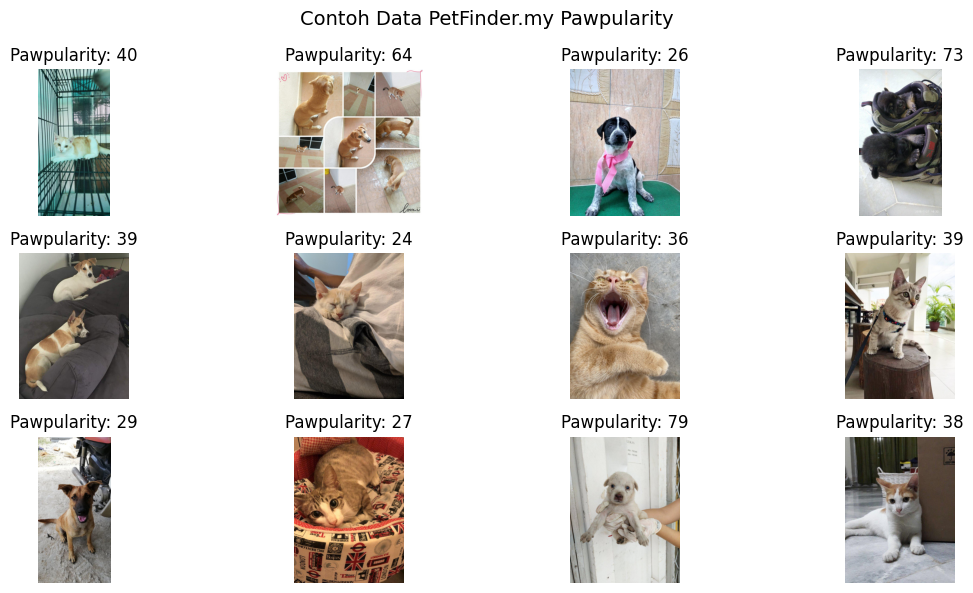

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

# Muat CSV
df = pd.read_csv('/content/paw/train.csv')
df['path'] = df['Id'].apply(lambda x: f"/content/paw/train/{x}.jpg")
print(df.head())

# Tampilkan 12 contoh gambar
plt.figure(figsize=(12, 6))
for i, row in enumerate(df.sample(12, random_state=42).itertuples()):
    img = Image.open(row.path)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Pawpularity: {row.Pawpularity}")
    plt.axis('off')

plt.suptitle("Contoh Data PetFinder.my Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

IMG_SIZE = 224
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

def load_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0
    return img, tf.cast(label, tf.float32)

train_ds = tf.data.Dataset.from_tensor_slices((train_df['path'], train_df['Pawpularity']))\
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
    .shuffle(4096).batch(64).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_df['path'], val_df['Pawpularity']))\
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
    .batch(64).prefetch(tf.data.AUTOTUNE)

print(f"Dataset siap digunakan — {len(train_df)} untuk training, {len(val_df)} untuk validasi.")

Dataset siap digunakan — 7929 untuk training, 1983 untuk validasi.


In [44]:
from tensorflow.keras import layers, models

base = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base.trainable = False  # freeze sementara

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply_8 (Multiply)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_15     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [33]:
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5)
]

history = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=cb, verbose=1)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 118s 550ms/step - loss: 786.3913 - mae: 21.3519 - val_loss: 478.9568 - val_mae: 16.1224 - learning_rate: 0.0010
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 45s 241ms/step - loss: 409.8100 - mae: 14.9249 - val_loss: 434.0147 - val_mae: 15.5725 - learning_rate: 0.0010
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 43s 229ms/step - loss: 395.4852 - mae: 14.6247 - val_loss: 404.3314 - val_mae: 14.9115 - learning_rate: 0.0010
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 43s 228ms/step - loss: 357.2631 - mae: 13.9740 - val_loss: 388.5687 - val_mae: 14.5614 - learning_rate: 0.0010
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 50s 268ms/step - loss: 370.5758 - mae: 14.2771 - val_loss: 379.1791 - val_mae: 14.4601 - learning_rate: 0.0010
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 45s 237ms/step - loss: 344.6672 - mae: 13.8080 - val_loss: 377.0780 - val_mae: 14.3486 - learning_rate: 0.0010
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 47s 249ms/step - loss: 336.4261 - mae: 13.6693 - val_

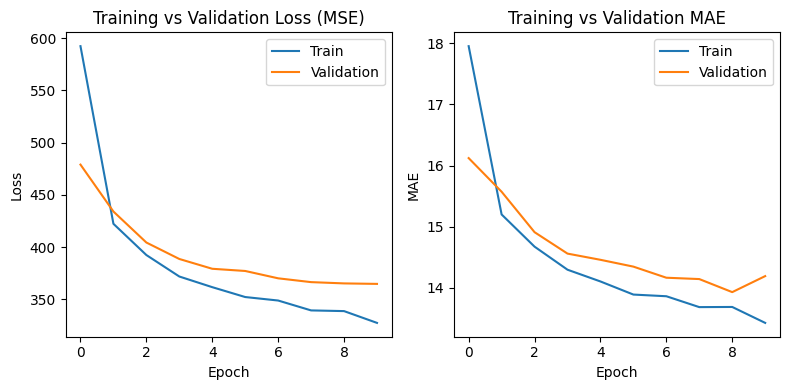

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Training vs Validation Loss (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()

plt.subplot(1, 2, 2)

plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Validation')
plt.title("Training vs Validation MAE")
plt.xlabel("Epoch"); plt.ylabel("MAE"); plt.legend()

plt.tight_layout()
plt.show()

MAE  = 14.19
RMSE = 19.10
R²   = 0.175


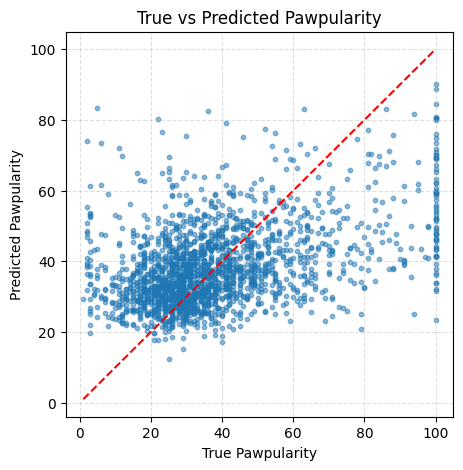

In [35]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt

y_true = val_df['Pawpularity'].values.astype(np.float32)
y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in val_ds])

mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(np.mean((y_true - y_pred)**2))
r2 = r2_score(y_true, y_pred)

print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.3f}")

# Plot hasil prediksi vs nilai sebenarnya:
plt.figure(figsize=(5, 5))
plt.scatter(y_true, y_pred, s=10, alpha=0.5)

lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')

plt.xlabel("True Pawpularity")
plt.ylabel("Predicted Pawpularity")
plt.title("True vs Predicted Pawpularity")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

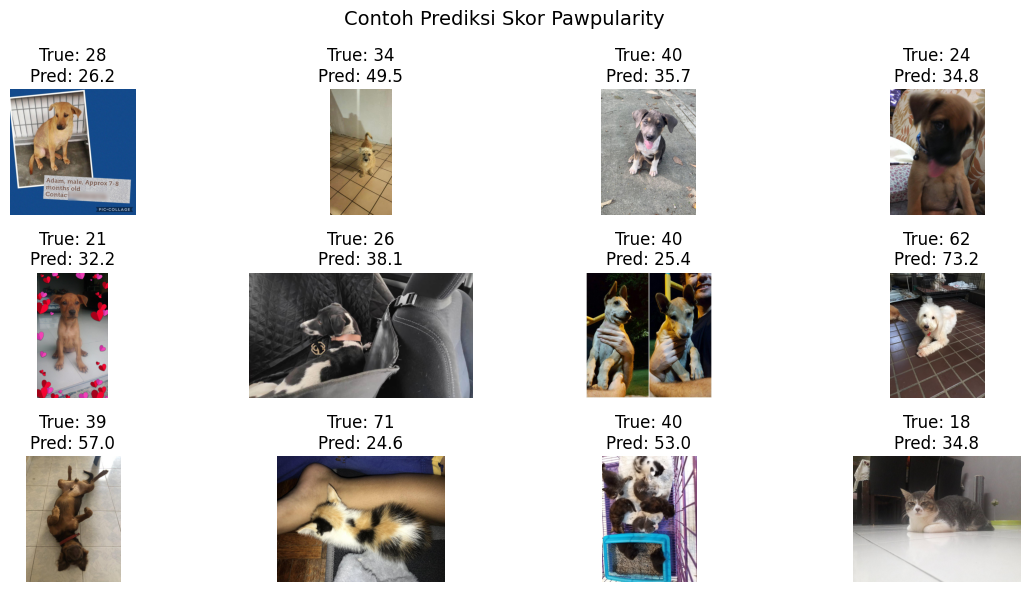

In [36]:
import random
from PIL import Image

sample_rows = val_df.sample(12, random_state=1)

plt.figure(figsize=(12, 6))
for i, row in enumerate(sample_rows.itertuples()):
    img = Image.open(row.path)
    pred = model.predict(tf.expand_dims(load_image(row.path, row.Pawpularity)[0], 0),
                         verbose=0).ravel()[0]

    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"True: {row.Pawpularity}\nPred: {pred:.1f}")
    plt.axis('off')

plt.suptitle("Contoh Prediksi Skor Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

### Tantangan Mini
* Coba tambahkan data augmentation agar model tidak bosan dengan pola yang sama.
* Gunakan EfficientNetB3 atau ResNet50, lalu bandingkan hasilnya.
* Buat eksperimen kecil: pisahkan anjing vs kucing — apakah model bias ke salah satu spesies?
* Tambahkan fitur non-visual (misal brightness rata-rata) ke model regresi.



In [37]:
# ==============================================================================
# 🚀 BAGIAN 1: SETUP, UNDUH DATA & PERSIAPAN AWAL
# ==============================================================================
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras import layers, models, applications
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from math import sqrt
from tqdm.notebook import tqdm

# 1.1. Konfigurasi Kaggle API (Pastikan Anda sudah upload kaggle.json)
print("Mempersiapkan Kaggle API...")
if os.path.exists("kaggle.json"):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
    print("✅ Kaggle API siap.")
else:
    print(" GAGAL: 'kaggle.json' tidak ditemukan. Silakan upload terlebih dahulu.")

# 1.2. Unduh dan Ekstrak Dataset
DATA_DIR = "/content/pawpularity_data"
if not os.path.exists(DATA_DIR):
    print("Mengunduh dataset PetFinder Pawpularity...")
    os.system('kaggle competitions download -c petfinder-pawpularity-score -p /content -q')
    os.makedirs(DATA_DIR, exist_ok=True)
    os.system(f'unzip -q /content/petfinder-pawpularity-score.zip -d {DATA_DIR}')
    print(f"✅ Dataset berhasil diekstrak ke '{DATA_DIR}'.")
else:
    print(f"✅ Dataset sudah ada di '{DATA_DIR}'.")

# 1.3. Muat Data CSV
df = pd.read_csv(f"{DATA_DIR}/train.csv")
df['ImagePath'] = df['Id'].apply(lambda x: f"{DATA_DIR}/train/{x}.jpg")
print(f"\nTotal data awal: {len(df)} baris.")


# ==============================================================================
# 🔬 BAGIAN 2: FITUR ENGINEERING & EKSPERIMEN ANJING VS KUCING
# ==============================================================================
print("\nMemulai Feature Engineering dan Klasifikasi Spesies...")

# 2.1. [MODIFIKASI] Tambah fitur non-visual: Brightness rata-rata
def get_brightness(image_path):
    """Menghitung kecerahan rata-rata gambar."""
    try:
        img = cv2.imread(image_path)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        brightness = img_hsv[:,:,2].mean()
        return brightness / 255.0 # Normalisasi 0-1
    except:
        return 0.5 # Default value jika gambar error

# Terapkan fungsi ke dataframe (menggunakan tqdm untuk progress bar)
tqdm.pandas(desc="Menghitung Brightness")
df['Brightness'] = df['ImagePath'].progress_apply(get_brightness)
print("✅ Fitur 'Brightness' berhasil ditambahkan.")

# 2.2. [MODIFIKASI] Eksperimen: Pisahkan Anjing vs. Kucing
# Kita gunakan MobileNetV2 untuk klasifikasi cepat
species_classifier = applications.MobileNetV2(weights='imagenet')
def classify_species(image_path):
    """Mengklasifikasikan gambar sebagai 'Anjing' atau 'Kucing'."""
    try:
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)
        img_preprocessed = applications.mobilenet_v2.preprocess_input(img_array)

        preds = species_classifier.predict(img_preprocessed, verbose=0)
        decoded_preds = applications.mobilenet_v2.decode_predictions(preds, top=5)[0]

        is_dog = any('dog' in pred[1] for pred in decoded_preds)
        is_cat = any('cat' in pred[1] for pred in decoded_preds)

        if is_dog and not is_cat: return 'Anjing'
        if is_cat and not is_dog: return 'Kucing'
        return 'Lainnya' # Jika ambigu atau bukan keduanya
    except:
        return 'Error'

tqdm.pandas(desc="Klasifikasi Spesies")
df['Species'] = df['ImagePath'].progress_apply(classify_species)
print("✅ Fitur 'Species' berhasil ditambahkan.")
print("\nDistribusi Spesies:")
print(df['Species'].value_counts())


# ==============================================================================
# 📦 BAGIAN 3: PERSIAPAN DATASET (TERMASUK AUGMENTASI)
# ==============================================================================
print("\nMempersiapkan pipeline data dengan tf.data...")

# 3.1. Definisikan kolom metadata
METADATA_COLS = [
    'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
    'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur',
    'Brightness' # Tambahkan fitur baru kita
]
TARGET_COL = 'Pawpularity'

# 3.2. Pisahkan data
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Species'])

# 3.3. [MODIFIKASI] Definisikan layer augmentasi
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
], name="data_augmentation")
print("✅ Augmentasi (Flip, Rotasi, Zoom) siap digunakan.")

# 3.4. Fungsi untuk membuat pipeline tf.data
IMG_SIZE = 224 # Ukuran default untuk banyak model
BATCH_SIZE = 32

def create_dataset(dataframe, is_training=True):
    """Membuat pipeline dataset yang efisien."""
    paths = dataframe['ImagePath'].values
    metadata = dataframe[METADATA_COLS].values.astype(np.float32)
    labels = dataframe[TARGET_COL].values.astype(np.float32)

    def load_and_preprocess(path, meta, label):
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
        if is_training:
            img = data_augmentation(img)
        # Normalisasi dilakukan di dalam model
        return {'image_input': img, 'meta_input': meta}, label

    dataset = tf.data.Dataset.from_tensor_slices((paths, metadata, labels))
    dataset = dataset.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=1024)
    dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return dataset

train_ds = create_dataset(train_df, is_training=True)
val_ds = create_dataset(val_df, is_training=False)
print("✅ Pipeline data latih dan validasi berhasil dibuat.")

# ==============================================================================
# 🧠 BAGIAN 4: FUNGSI UNTUK MEMBANGUN, MELATIH & EVALUASI MODEL
# ==============================================================================

def build_model(model_name='EfficientNetB3'):
    """Membangun model regresi dengan backbone yang bisa diganti."""
    print(f"\n--- Membangun model dengan backbone: {model_name} ---")

    # Pilih base model
    if model_name == 'EfficientNetB3':
        base_model_fn = applications.EfficientNetB3
        preprocess_fn = applications.efficientnet.preprocess_input
        img_size_model = 300 # EfficientNetB3 lebih baik dengan ukuran ini
    elif model_name == 'ResNet50':
        base_model_fn = applications.ResNet50
        preprocess_fn = applications.resnet.preprocess_input
        img_size_model = 224
    else:
        raise ValueError("Nama model tidak valid. Pilih 'EfficientNetB3' atau 'ResNet50'.")

    # Definisikan Input
    image_input = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name='image_input')
    meta_input = layers.Input(shape=(len(METADATA_COLS),), name='meta_input')

    # Preprocessing & Base Model
    resized_img = layers.Resizing(img_size_model, img_size_model)(image_input)
    preprocessed_img = preprocess_fn(resized_img)
    base_model = base_model_fn(include_top=False, weights='imagenet', input_tensor=preprocessed_img)
    base_model.trainable = False # Freeze

    # Gabungkan Cabang Model
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(128, activation='relu')(x)

    y = layers.Dense(64, activation='relu')(meta_input)
    y = layers.Dense(32, activation='relu')(y)

    combined = layers.Concatenate()([x, y])
    combined = layers.Dropout(0.4)(combined)
    combined = layers.Dense(64, activation='relu')(combined)
    output = layers.Dense(1)(combined) # Output regresi

    model = models.Model(inputs=[image_input, meta_input], outputs=output)
    return model

def train_and_evaluate(model, train_data, val_data, model_name):
    """Fungsi untuk melatih dan mengevaluasi model."""
    print(f"\n--- Melatih dan Mengevaluasi: {model_name} ---")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
    ]

    history = model.fit(train_data, validation_data=val_data, epochs=15, callbacks=callbacks, verbose=1)

    # Evaluasi
    y_true = np.concatenate([y for x, y in val_data], axis=0)
    y_pred = model.predict(val_data).ravel()

    mae = mean_absolute_error(y_true, y_pred)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print("\n--- Hasil Evaluasi ---")
    print(f"✅ MAE  ({model_name}): {mae:.3f}")
    print(f"✅ RMSE ({model_name}): {rmse:.3f}")
    print(f"✅ R²   ({model_name}): {r2:.3f}")

    return {'mae': mae, 'rmse': rmse, 'r2': r2}

# ==============================================================================
# 🚀 BAGIAN 5: EKSEKUSI UTAMA & PERBANDINGAN
# ==============================================================================

# 5.1. Uji Coba dengan EfficientNetB3
effnet_model = build_model('EfficientNetB3')
effnet_results = train_and_evaluate(effnet_model, train_ds, val_ds, 'EfficientNetB3')

# 5.2. Uji Coba dengan ResNet50
resnet_model = build_model('ResNet50')
resnet_results = train_and_evaluate(resnet_model, train_ds, val_ds, 'ResNet50')

# 5.3. Hasil Eksperimen Anjing vs. Kucing
print("\n\n--- Hasil Eksperimen Bias Anjing vs. Kucing ---")
# Gunakan model terbaik (misal, EfficientNetB3) untuk analisis ini
best_model = effnet_model if effnet_results['mae'] < resnet_results['mae'] else resnet_model
best_model_name = "EfficientNetB3" if effnet_results['mae'] < resnet_results['mae'] else "ResNet50"
print(f"Menggunakan model terbaik: {best_model_name}")

# Filter data validasi untuk anjing dan kucing
dog_df_val = val_df[val_df['Species'] == 'Anjing']
cat_df_val = val_df[val_df['Species'] == 'Kucing']

if not dog_df_val.empty:
    dog_val_ds = create_dataset(dog_df_val, is_training=False)
    dog_true = dog_df_val[TARGET_COL].values
    dog_pred = best_model.predict(dog_val_ds).ravel()
    dog_mae = mean_absolute_error(dog_true, dog_pred)
    print(f"🐶 MAE untuk Anjing: {dog_mae:.3f} (pada {len(dog_df_val)} sampel)")

if not cat_df_val.empty:
    cat_val_ds = create_dataset(cat_df_val, is_training=False)
    cat_true = cat_df_val[TARGET_COL].values
    cat_pred = best_model.predict(cat_val_ds).ravel()
    cat_mae = mean_absolute_error(cat_true, cat_pred)
    print(f"🐱 MAE untuk Kucing: {cat_mae:.3f} (pada {len(cat_df_val)} sampel)")


Mempersiapkan Kaggle API...
✅ Kaggle API siap.
Mengunduh dataset PetFinder Pawpularity...
✅ Dataset berhasil diekstrak ke '/content/pawpularity_data'.

Total data awal: 9912 baris.

Memulai Feature Engineering dan Klasifikasi Spesies...


Menghitung Brightness:   0%|          | 0/9912 [00:00<?, ?it/s]

✅ Fitur 'Brightness' berhasil ditambahkan.
14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Klasifikasi Spesies:   0%|          | 0/9912 [00:00<?, ?it/s]

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Fitur 'Species' berhasil ditambahkan.

Distribusi Spesies:
Species
Lainnya    4827
Kucing     4381
Anjing      704
Name: count, dtype: int64

Mempersiapkan pipeline data dengan tf.data...
✅ Augmentasi (Flip, Rotasi, Zoom) siap digunakan.
✅ Pipeline data latih dan validasi berhasil dibuat.

--- Membangun model dengan backbone: EfficientNetB3 ---
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Melatih dan Mengevaluasi: EfficientNetB3 ---
Epoch 1/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 230s 681ms/step - loss: 813.6176 - mae: 21.5355 - val_loss: 375.5326 - val_mae: 14.1541 - learning_rate: 0.0010
Epoch 2/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 120s 438ms/step - loss: 383.9095 - mae: 14.4349 - val_loss: 380.3672 - val_mae: 14.0164 - learning_rate: 0.0010
Epoch 3/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 120s 436ms/step - loss: 361.9164 - mae: 14.1236 - val_loss: 353.3782 - val_mae: 13.6554 - learning_rate: 0.0010
Epoch 4/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 120s 437m

## Penugasan

1. Gunakan foto pribadi untuk menampilkan ujicoba prediksi usia kalian — tampilkan hasilnya di laporan!
2. Gunakan foto pribadi (atau hewan peliharaan sendiri) dan uji model Pawpularity — tampilkan hasilnya di laporan!


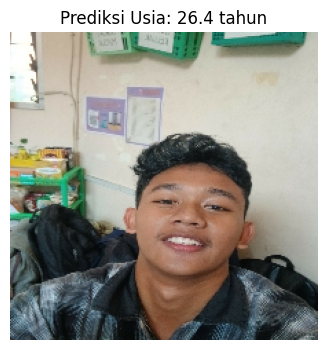

In [39]:
# TUGAS 1
# Ganti 'wajah_saya.jpg' dengan nama file foto Anda
path_foto_pribadi = 'wajah_saya.jpg'

# --- Kode untuk memuat dan memproses gambar ---
try:
    img = tf.io.read_file(path_foto_pribadi)
    img = tf.image.decode_jpeg(img, channels=3)
    img_processed = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0

    # Lakukan prediksi
    # Pastikan variabel 'model' berisi model prediksi usia yang sudah dilatih
    pred_age = model.predict(tf.expand_dims(img_processed, 0), verbose=0).ravel()[0]

    # Tampilkan hasil
    plt.figure(figsize=(4, 4))
    plt.imshow(img_processed.numpy())
    plt.title(f"Prediksi Usia: {pred_age:.1f} tahun")
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{path_foto_pribadi}' tidak ditemukan. Pastikan sudah diunggah.")
except NameError as e:
    print(f"Error: Pastikan variabel yang dibutuhkan (seperti 'model' atau 'IMG_SIZE') sudah terdefinisi.")
    print(f"Detail error: {e}")

TensorFlow Version: 2.19.0
✅ Kaggle API siap.
✅ Dataset sudah ada.

Mempersiapkan model untuk prediksi...

Melatih model sebentar (1 epoch)...
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 87ms/step - loss: 1582.3600 - mae: 33.4548
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 724.2411 - mae: 19.1197
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 579.2424 - mae: 17.3125
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 541.6834 - mae: 16.7683
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 495.9655 - mae: 16.1796
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 460.8178 - mae: 15.8450
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 445.7868 - mae: 15.6697
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 428.6636 - mae: 15.3347
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 395.7687 - mae: 14.8252
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 383.6925 - mae: 14.8038
✅ Model siap untuk mel

Saving kucing_saya.jpg to kucing_saya (2).jpg

File 'kucing_saya (2).jpg' berhasil diunggah.

✨ Skor Pawpularity yang Diprediksi: 42.4 / 100 ✨


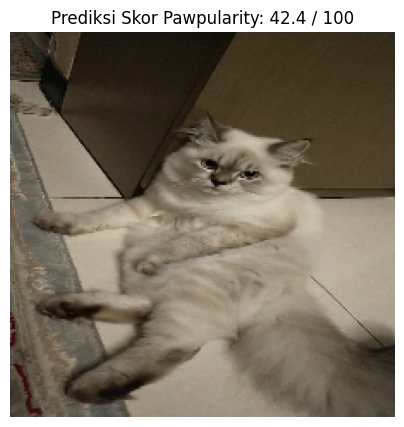

In [2]:
# TUGAS 2
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from google.colab import files
from PIL import Image

print("TensorFlow Version:", tf.__version__)

# Setup Kaggle API (pastikan kaggle.json sudah diunggah sebelumnya)
if os.path.exists("kaggle.json"):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
    print("✅ Kaggle API siap.")
else:
    print(" GAGAL: Harap upload 'kaggle.json' terlebih dahulu sebelum menjalankan sel ini.")

# Unduh dan ekstrak dataset jika belum ada
DATA_DIR = "/content/pawpularity_data"
if not os.path.exists(DATA_DIR):
    print("Mengunduh dataset PetFinder Pawpularity (sekitar 800MB)...")
    os.system('kaggle competitions download -c petfinder-pawpularity-score -p /content -q')
    os.makedirs(DATA_DIR, exist_ok=True)
    os.system(f'unzip -q /content/petfinder-pawpularity-score.zip -d {DATA_DIR}')
    print(f"✅ Dataset berhasil diekstrak.")
else:
    print(f"✅ Dataset sudah ada.")

# Muat data dari CSV
df = pd.read_csv(f"{DATA_DIR}/train.csv")
df['ImagePath'] = df['Id'].apply(lambda x: f"{DATA_DIR}/train/{x}.jpg")

# ------------------------------------------------------------------------------
# BAGIAN 2: PERSIAPAN & PELATIHAN MODEL SINGKAT
# ------------------------------------------------------------------------------
print("\nMempersiapkan model untuk prediksi...")

# Definisikan konstanta dan metadata
IMG_SIZE = 224
BATCH_SIZE = 32
METADATA_COLS = ['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
TARGET_COL = 'Pawpularity'

# Gunakan sampel kecil data untuk pelatihan cepat
train_sample_df = df.sample(n=1024, random_state=42)

# Fungsi untuk membuat pipeline data
def create_dataset(dataframe):
    paths = dataframe['ImagePath'].values
    metadata = dataframe[METADATA_COLS].values.astype(np.float32)
    labels = dataframe[TARGET_COL].values.astype(np.float32)

    def load_and_preprocess(path, meta, label):
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
        return {'image_input': img, 'meta_input': meta}, label

    dataset = tf.data.Dataset.from_tensor_slices((paths, metadata, labels))
    dataset = dataset.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return dataset

train_ds_sample = create_dataset(train_sample_df)

# Definisikan arsitektur model Pawpularity
image_input = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name='image_input')
meta_input = layers.Input(shape=(len(METADATA_COLS),), name='meta_input')

base_model = applications.EfficientNetB0(include_top=False, weights='imagenet', input_tensor=image_input)
base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
image_branch = layers.Dense(64, activation='relu')(x)

meta_branch = layers.Dense(32, activation='relu')(meta_input)
meta_branch = layers.Dense(16, activation='relu')(meta_branch)

combined = layers.Concatenate()([image_branch, meta_branch])
combined = layers.Dropout(0.3)(combined)
output = layers.Dense(1, name='output')(combined)


model = models.Model(inputs=[image_input, meta_input], outputs=output)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Latih model hanya untuk 1 epoch agar siap digunakan
print("\nMelatih model sebentar (1 epoch)...")
model.fit(train_ds_sample, epochs=10, verbose=1)
print("✅ Model siap untuk melakukan prediksi!")


# ------------------------------------------------------------------------------
# BAGIAN 3: UJI COBA PADA FOTO ANDA
# ------------------------------------------------------------------------------
print("\n" + "="*50)
print("🐾 SEKARANG, SILAKAN UNGGAH FOTO HEWAN ANDA 🐾")
print("="*50)

# Gunakan files.upload() untuk mengunggah file
uploaded_files = files.upload()

# Dapatkan nama file yang diunggah (seharusnya hanya ada satu)
if not uploaded_files:
    print("Tidak ada file yang diunggah. Silakan jalankan sel ini lagi.")
else:
    path_foto_hewan = list(uploaded_files.keys())[0]
    print(f"\nFile '{path_foto_hewan}' berhasil diunggah.")

    # --- Kode untuk memuat dan memproses gambar ---
    try:
        img = tf.io.read_file(path_foto_hewan)
        img = tf.image.decode_jpeg(img, channels=3)
        img_resized = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
        # Preprocessing khusus EfficientNet tidak diperlukan di sini karena sudah ada di dalam model

        # Buat input metadata dummy (12 fitur, kita isi dengan nol)
        dummy_metadata = tf.zeros([1, 12], dtype=tf.float32)

        # Siapkan input untuk model (harus dalam bentuk dictionary)
        inputs_for_model = {
            'image_input': tf.expand_dims(img_resized, 0), # Gunakan img_resized
            'meta_input': dummy_metadata
        }

        # Lakukan prediksi
        pred_score = model.predict(inputs_for_model, verbose=0).ravel()[0]

        # Tampilkan hasil
        print(f"\n✨ Skor Pawpularity yang Diprediksi: {pred_score:.1f} / 100 ✨")
        plt.figure(figsize=(5, 5))
        # Tampilkan gambar yang ukurannya sudah disesuaikan
        plt.imshow(tf.cast(img_resized, tf.uint8).numpy())
        plt.title(f"Prediksi Skor Pawpularity: {pred_score:.1f} / 100")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"\nTerjadi error saat prediksi: {e}")
        print("Pastikan file yang diunggah adalah gambar (JPG/PNG).")